# CNOT gates with linear optics
- Explore how success probability and optical transmittance affect the number of shots needed to gather a fixed number of samples when chaining multiple CNOT gates.
- Compare two CNOT implementations: a heralded CNOT (4 photons, success probability 2/27) that can be cascaded arbitrarily, and a post-processed CNOT (2 photons, success probability 1/9) that can only appear once in series.
- Success probability is the chance a single gate run yields the desired outcome; 
- lower success probabilities or losses require more shots to hit the target sample count.


In [1]:
def calc_shots(n_samples, n_CNOTs, transmittance, postprocessed):
   ''' postprocessed: bool, whether the last CNOT is post-processed or heralded '''
   if n_CNOTs == 1 and postprocessed:
      n_photons = 2
   else:
      n_photons = 4
   if postprocessed:
      p_success = 1/9 * (2/27) ** (n_CNOTs-1)
   else:
      p_success = (2/27) ** (n_CNOTs)
       
   n_shots = n_samples / (p_success * transmittance ** n_photons)
   return n_shots

In [2]:

n_CNOTs = 3 # number of CNOT gates in series
n_samples = 1000 # desired number of successful samples

transmittance = 0.05 # e.g., 5% transmittance

print(f"Calculating for {n_CNOTs} CNOTs and {n_samples} samples:")
print("Noiseless case:")
print(f"Post-Processed Shots: {calc_shots(n_samples=n_samples, n_CNOTs=n_CNOTs, transmittance=1, postprocessed=True):,.0f}")
print(f"Heralded Shots: {calc_shots(n_samples=n_samples, n_CNOTs=n_CNOTs, transmittance=1, postprocessed=False):,.0f}")
print(f"With {transmittance*100}% Transmittance:")
print(f"Post-Processed Shots: {calc_shots(n_samples=n_samples, n_CNOTs=n_CNOTs, transmittance=transmittance, postprocessed=True):,.0f}")
print(f"Heralded Shots: {calc_shots(n_samples=n_samples, n_CNOTs=n_CNOTs, transmittance=transmittance, postprocessed=False):,.0f}")

Calculating for 3 CNOTs and 1000 samples:
Noiseless case:
Post-Processed Shots: 1,640,250
Heralded Shots: 2,460,375
With 5.0% Transmittance:
Post-Processed Shots: 262,440,000,000
Heralded Shots: 393,660,000,000


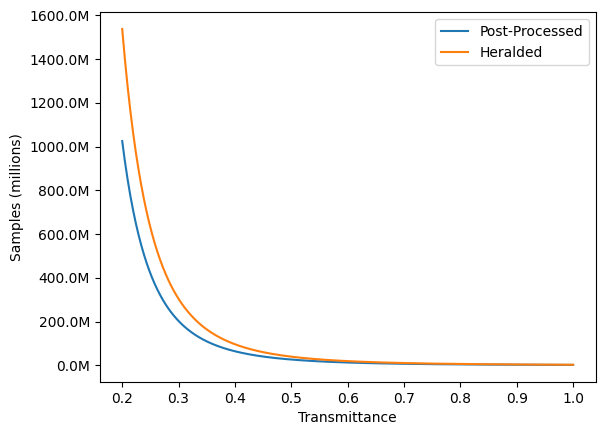

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

x = np.linspace(0.2, 1, 500)
y1 = calc_shots(n_samples=1000, n_CNOTs=n_CNOTs, transmittance=x, postprocessed=True)
y2 = calc_shots(n_samples=1000, n_CNOTs=n_CNOTs, transmittance=x, postprocessed=False)

fig, ax = plt.subplots()
ax.plot(x, y1, label="Post-Processed")
ax.plot(x, y2, label="Heralded")
ax.set_xlabel("Transmittance")
ax.set_ylabel("Samples (millions)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y / 1e6:.1f}M"))
ax.legend()

plt.show()
